---

Ok, now lets transform this into a dataframe and look at it using some of the python libraries

In [37]:
file = uproot.open("./data/gm2offline_ana_100files_fullTrees.root")
tree = file["farline/evwTree"]

df = tree.pandas.df()
df.describe()

AttributeError: 'asjagged' object has no attribute 'asdtype'

In [ ]:
df = tree.pandas.df()
df['timeEastCorrected'] = df['timeEast'] - df['timeCorr']
df.columns = ["runNum","subRunNum","fill","island","caloNum","timeEast","timeWest","deltaT","westX",
                "westY", "eastX","eastY","deltaX","deltaY","energyEast","energyWest","deltaE","timeCorr",
                "timeEastCorrected"]
df.describe()

In [24]:
dflite = df.sample(n=100,random_state=123456789)
dflite.head()

,runNum,subRunNum,fill,island,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
34253,16368,427,109,142,2,239875.015347,239877.599501,-2.584154,0.500000,4.989417,0.500000,4.989417,0.093647,0.017780,358.638606,557.262232,-198.623625,-2.533535,239877.548882
2296,16368,427,6,146,17,143483.400742,143484.218595,-0.817853,2.695069,3.212658,2.695069,3.212658,0.076216,-0.055957,573.585941,886.913812,-313.327871,-0.760867,143484.161609
24607,16368,427,82,150,3,86785.391996,86787.822192,-2.430196,4.048249,1.546852,4.048249,1.546852,0.004337,-0.046852,1306.989904,1649.221870,-342.231966,-2.430552,86787.822548
49017,16368,427,154,146,23,226717.163306,226717.696752,-0.533447,1.730303,3.413150,1.730303,3.413150,0.025855,0.011670,1152.850436,2192.080957,-1039.230521,-0.464979,226717.628284
41,16368,427,2,131,2,99315.046133,99317.577543,-2.531409,5.988418,3.815196,5.988418,3.815196,-0.042749,0.007863,764.800773,1075.647366,-310.846593,-2.533535,99317.579668


/home/jlab/anaconda3/lib/python3.6/site-packages/seaborn/palettes.py:727: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))


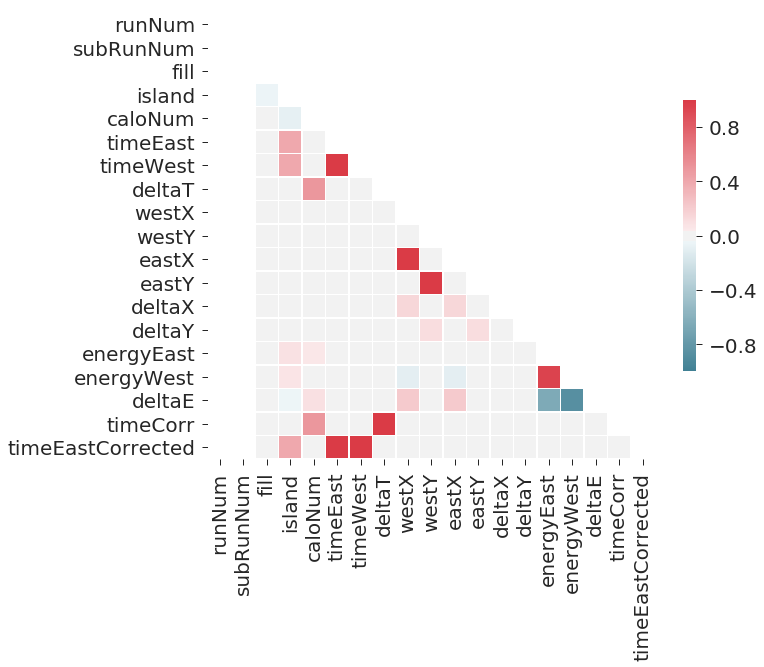

In [25]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)

plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/jlab/anaconda3/lib/python3.6/site-

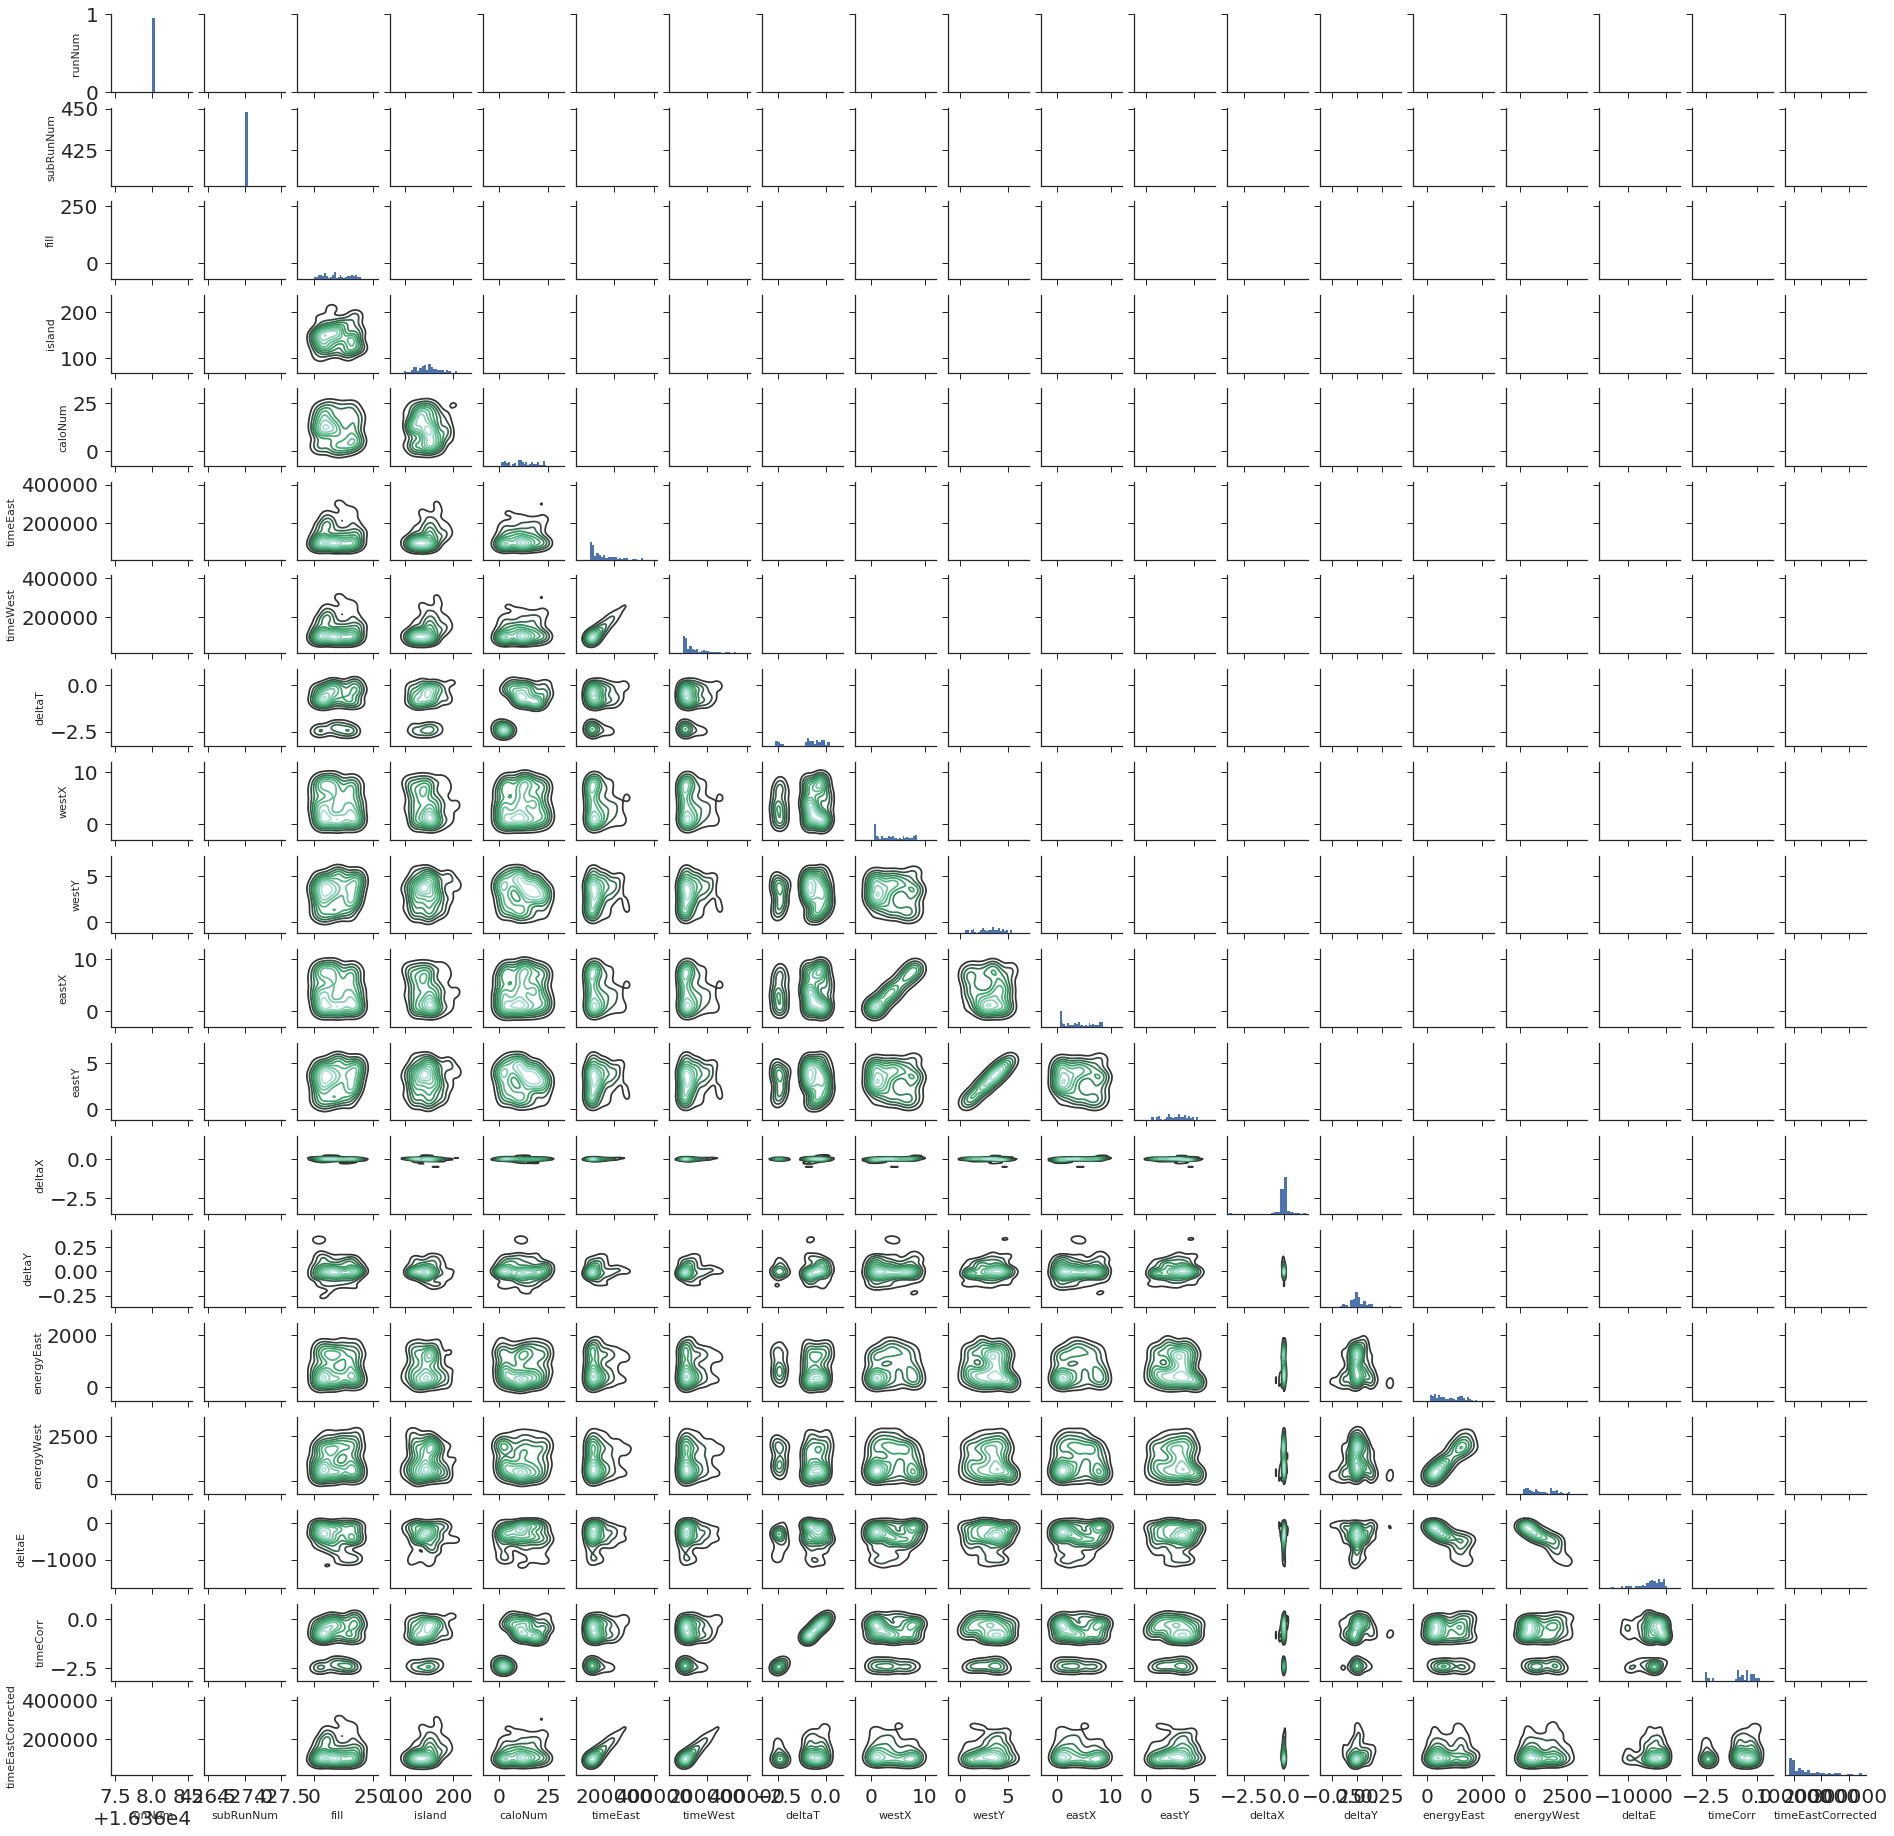

In [26]:
g = sns.PairGrid(dflite)
#g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

#g.map_offdiag(pairgrid_heatmap, bins=20, norm=matplotlib.colors.LogNorm())

g.map_diag(plt.hist,bins=24)
g.map_lower(sns.kdeplot)

g.fig.set_size_inches(25,25)

--- 

Now lets take a look at the recon east clusters for which no corresponding recon west cluster could be found

In [27]:
terr.Print()

SystemError: void TTree::Print(const char* option = "") =>
    problem in C++; program state has been reset


 *** Break *** segmentation violation
 Generating stack trace...


In [ ]:
c = r.TCanvas()
terr.Draw("positionEast.second:positionEast.first","","colz")
c.SetLogz()
c.Draw()

In [ ]:
c = r.TCanvas()
terr.Draw("caloNum","","colz")
c.Draw()

In [ ]:
c = r.TCanvas()
heast = r.TH1D("heast","Energy in Recon East Clusters; Energy [MeV]; Counts [Normalized]",300,0,3000)
hall = heast.Clone("hall")

terr.Draw("energyEast>>heast","","goff")
heast.Scale(1/(heast.GetEntries()))
heast.Draw("HIST")

tcomp.Draw("energyEast>>hall","","goff")
hall.Scale(1/(hall.GetEntries()))
hall.SetLineColor(2)
hall.Draw("HIST SAME")

leg = r.TLegend(0.5,0.8,0.9,0.9)
leg.AddEntry(heast ,"Recon East Clusters Without Pairs ["+str(int(heast.GetEntries()))+"]", "l")
leg.AddEntry(hall ,"Recon East Clusters With Pairs ["+str(int(hall.GetEntries()))+"]", "pl")
leg.Draw()

c.SetLogy()
c.Draw()

In [ ]:
jackknife = heast.Clone("jackknife")
jackknife.Add(hall,-1)


for bin in range(int(jackknife.GetNbinsX())):
    content = jackknife.GetBinContent(bin)
    jackknife.SetBinContent(bin,content+.01) #SHIFT IT UPWARDS SO THAT WE CAN PUT IT ON A LOG SCALE
    
c = r.TCanvas()
c.SetLogy()
jackknife.SetTitle("Recon East: E_{without pairs} - E_{with pairs}")
jackknife.GetYaxis().SetTitle("Counts [Normalized] + 0.01")
jackknife.Draw("HIST")
c.Draw()

In [ ]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
herrxy = r.TH2D("herrxy","herrxy; x [xtals]; y [xtals]",90,0,9,60,0,6)
hcompxy = herrxy.Clone("hcompxy")
terr.Draw("positionEast.second:positionEast.first>>herrxy","","goff")
herrxy.Draw("COLZ")
herrxy.Scale(1/(herrxy.GetEntries()))
r.gPad.SetLogz()

c.cd(2)
tcomp.Draw("positionEast.second:positionEast.first>>hcompxy","","goff")
hcompxy.Scale(1/(hcompxy.GetEntries()))
hcompxy.Draw("COLZ")
r.gPad.SetLogz()

c.Draw()

In [ ]:
jackknifeXY = herrxy.Clone("jackknifeXY")
jackknifeXY.Add(hcompxy,-1)

bins = (int(jackknifeXY.GetNbinsX())) * (int(jackknifeXY.GetNbinsY()))
print(bins)


for binx in range(int(jackknifeXY.GetNbinsX())):
    for biny in range( int(jackknifeXY.GetNbinsY()) ):
        bin = jackknifeXY.GetBin(binx+1,biny+1)
        content = jackknifeXY.GetBinContent(bin)
        jackknifeXY.SetBinContent(bin,content+0.001) #SHIFT IT UPWARDS SO THAT WE CAN PUT IT ON A LOG SCALE

c = r.TCanvas()
jackknifeXY.Draw("COLZ")
jackknifeXY.SetTitle("$\\vec{x}_{Pairless} - \\vec{x}_{Paired}$")
c.SetLogz()
c.Draw()

In [ ]:
file = uproot.open("./data/gm2offline_ana_version5.root")
terr1 = file["farline/evwNoPartnerTree"]

In [ ]:
df = terr1.pandas.df()
df.describe()

In [ ]:
dflite = df[['fill','island','caloNum','first','second','energyEast']]
#d = sns.pairplot(dflite)
#plt.show()

In [ ]:
g = sns.PairGrid(dflite)
#g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

#g.map_offdiag(pairgrid_heatmap, bins=20, norm=matplotlib.colors.LogNorm())

g.map_diag(plt.hist,bins=24)
g.map_lower(sns.kdeplot, cmap="Blues_d",shade=True)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

g.map_upper(pairgrid_heatmap, bins=24, norm=matplotlib.colors.LogNorm())

g.fig.set_size_inches(25,25)
plt.show()